In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\Bogdan\OneDrive - University of Warwick\Desktop\Projects\(OIL) Oil Trading & Weather Dispersion\Price prediction\Data.csv")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['WTI'] = pd.to_numeric(df['WTI'])
df['Texas'] = pd.to_numeric(df['Texas'])
df = df.sort_values(by='DATE', ascending=True)
df = df.set_index('DATE')
df = df.drop(columns=['Dubai','UK','Dubai Price', 'Brent'])
df = df.asfreq(pd.infer_freq(df.index))
df = df.resample('W').mean()
df = df.dropna()
df

,Texas,WTI
DATE,,
2020-07-12,26.875,40.4250
2020-07-19,28.960,40.5700
2020-07-26,26.940,41.3380
2020-08-02,27.340,40.6860
2020-08-09,29.400,41.1600
...,...,...
2024-08-11,27.650,75.8450
2024-08-18,29.500,78.9975
2024-08-25,30.100,74.6780


In [4]:
temp_predictions = {'DATE': ['2024-09-15', '2024-09-22', '2024-09-29', '2024-10-06', '2024-10-13', '2024-10-20'], 'Predictions': ['23.817133', '26.571226', '24.504804', '20.734135', '19.494480', '17.877710']}
tp_df = pd.DataFrame(temp_predictions)
tp_df['DATE'] = pd.to_datetime(tp_df['DATE'], format='%Y-%m-%d')
tp_df['Predictions'] = pd.to_numeric(tp_df['Predictions'])
tp_df = tp_df.set_index('DATE')
tp_df

,Predictions
DATE,
2024-09-15,23.817133
2024-09-22,26.571226
2024-09-29,24.504804
2024-10-06,20.734135
2024-10-13,19.494480
2024-10-20,17.877710


In [5]:
train_data_Texas = df['Texas']
train_data_WTI = df['WTI']
future_dates = pd.date_range(start=df.index[-1] + timedelta(weeks=1), periods=6, freq='W')
rolling_predictions = pd.Series(index=future_dates)

for i in rolling_predictions.index:
    model = ARIMA(endog = train_data_WTI, exog = train_data_Texas, order = (3,1,3))
    model_fit = model.fit()
    prediction = model_fit.forecast(steps=1, exog = tp_df.loc[i]['Predictions'])
    rolling_predictions.loc[i] = prediction.item()
    train_data_WTI.loc[i] = prediction.item() # this is adding the pred observation to the train data so as to consider it for the next prediction
    train_data_Texas.loc[i] = tp_df.loc[i]['Predictions'] # this is adding the temp pred observation to the train data so as to consider it for the next oil prediction
rolling_predictions

c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2024-09-15    70.369976
2024-09-22    69.420347
2024-09-29    69.369185
2024-10-06    70.379255
2024-10-13    70.313486
2024-10-20    69.672599
Freq: W-SUN, dtype: float64

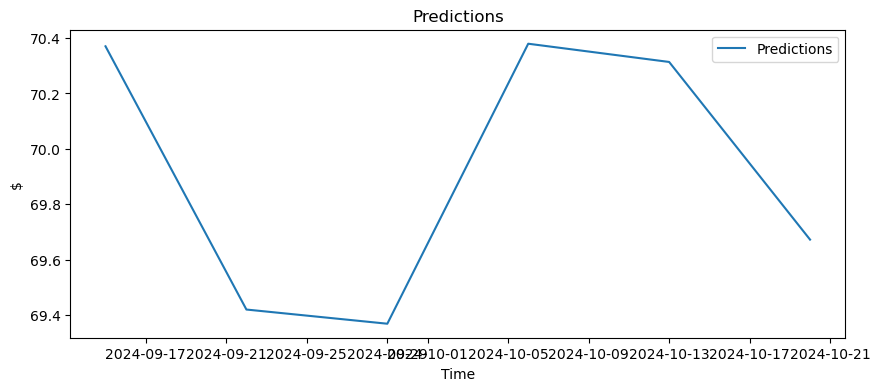

In [6]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions, label='Predictions')
plt.title('Predictions')
plt.xlabel('Time')
plt.ylabel('$')
plt.legend()

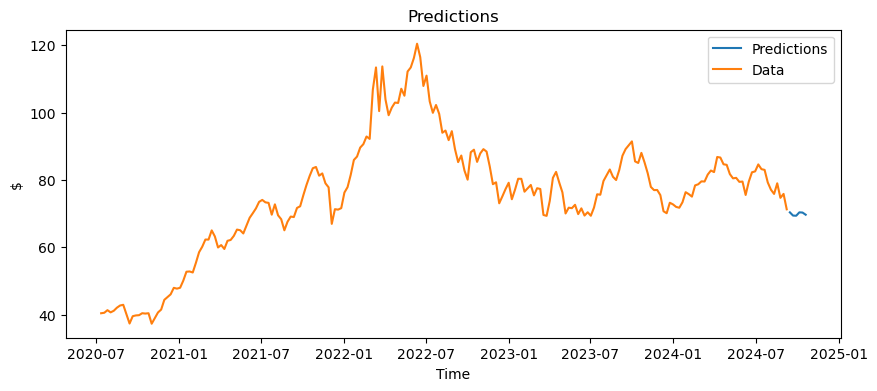

In [7]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions, label='Predictions')
plt.plot(df['WTI'], label='Data')
plt.title('Predictions')
plt.xlabel('Time')
plt.ylabel('$')
plt.legend()